<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
df = pd.read_csv("Lab 5.csv")

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,65000.0,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,65000.0,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,65000.0,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,65000.0,NaN


### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,6.543700e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,7.257636e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.122207e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.500000e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,6.500000e+04,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
df.isnull().sum().sort_values(ascending = False)

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
ResponseId                        0
Age                               0
Employment                        0
Check                             0
ConvertedCompYearly               0
Length: 114, dtype: int64

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



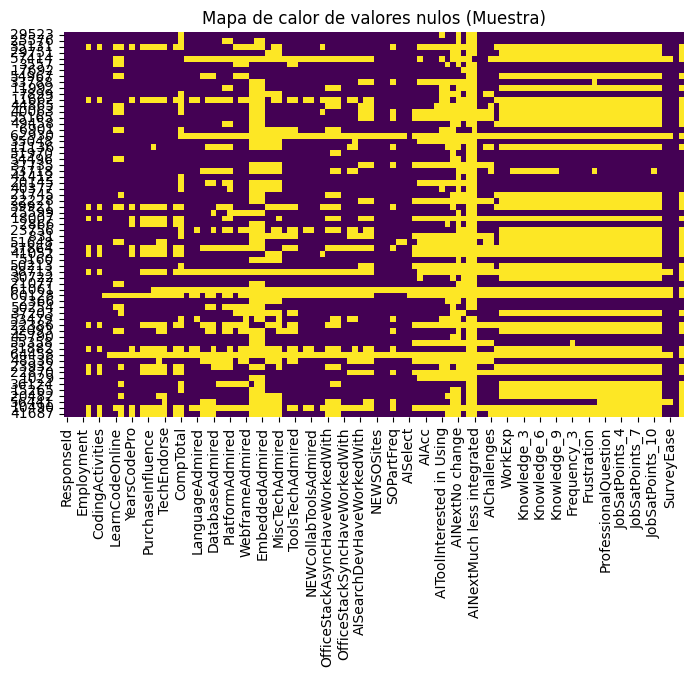

In [8]:
df_sample = df.sample(frac=0.001)
plt.figure(figsize=(8, 5))
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis', yticklabels=True)
plt.title("Mapa de calor de valores nulos (Muestra)")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [11]:
X = df["Employment"].isnull().sum()
print("Hay ", X, "valores faltantes en esta columna")

Hay  0 valores faltantes en esta columna


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [12]:
most_frequent = df["Employment"].mode()[0]
most_frequent

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [16]:
df["Employment"] = df["Employment"].fillna(most_frequent)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


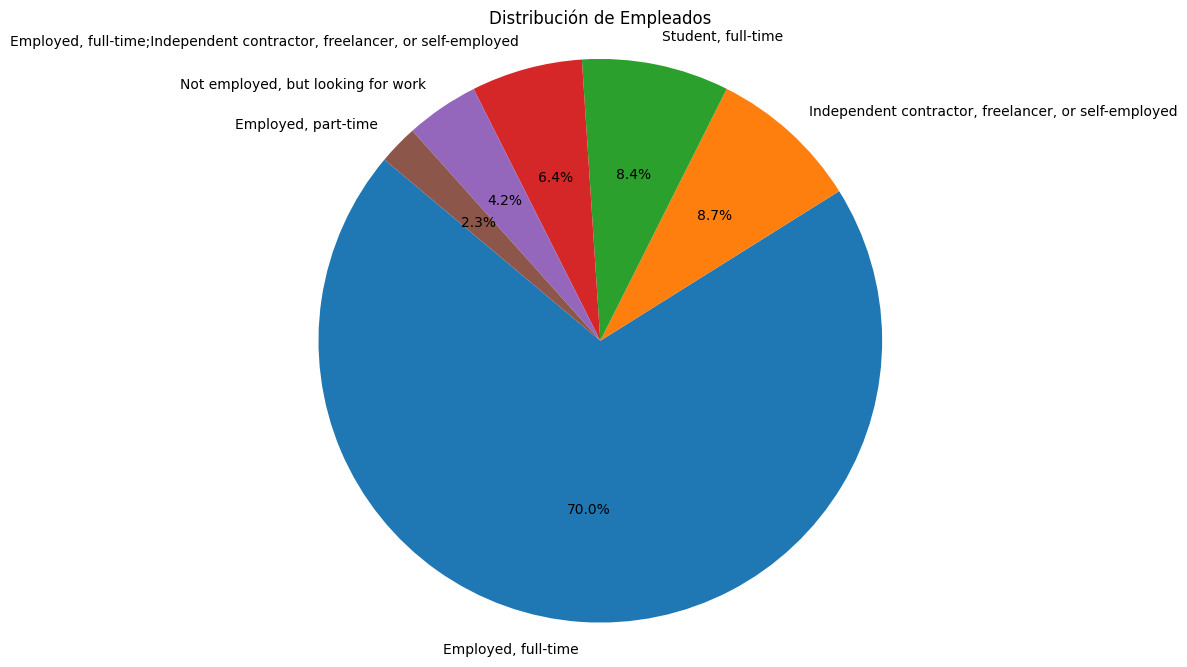

In [17]:
employment_counts = df['Employment'].value_counts().head(6)

plt.figure(figsize=(8, 8))
plt.pie(employment_counts.values, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Empleados")
plt.axis('equal')
plt.show()

In [18]:
df.to_csv("Lab 6.csv", index=False)

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
